## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [281]:
df = pd.read_csv('data/kc_house_data.csv')

In [282]:
#General Observation
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [283]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [284]:
#Checking Nulls in individual columns
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [285]:
#Quick Statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

Filtering the columns since there are some irrelevant measures in the dataset.

In [286]:
df1  = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built']]
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


Changing the index to help with the duplicate values

In [287]:
df1[df1.duplicated(keep=False, subset=['id'])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0.0,3,8,1939
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0.0,3,11,1997
324,7520000520,232000.0,2,1.00,1240,12092,1.0,NaN,3,6,1922
...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,502000.0,4,2.50,2680,5539,2.0,NaN,3,8,2013
20763,6300000226,240000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
20764,6300000226,380000.0,4,1.00,1200,2171,1.5,0.0,3,7,1933
21564,7853420110,594866.0,3,3.00,2780,6000,2.0,0.0,3,9,2013


In [288]:
# Removing duplicates and retaining the first row for each duplicate entry.
df1 = df1.drop_duplicates(keep='first', subset=['id'])

In [289]:
# making ID as index
df1.set_index('id', drop=True, append=False, inplace=True)
df1.index.name = None

Bedroom column as it had some unusual number 

In [290]:
df1['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [291]:
df1['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [292]:
df1[df1['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1947


In [293]:
df1['bedrooms'] = df1['bedrooms'].replace(33,3)

In [294]:
df1['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

Now Waterfront Column

In [295]:
df1['waterfront'].unique()

array([nan,  0.,  1.])

In [296]:
#This looks like this can be utilised later for checking if the property has waterfront or not
df1.waterfront.value_counts()

0.0    18921
1.0      146
Name: waterfront, dtype: int64

In [297]:
# So it would be fair to put it as 0 and converting 'waterfront' to an integer as decimals are..
#..unnecessary as we are only using it for categorical purpose.
df1['waterfront'] = df1['waterfront'].fillna(0).astype(int)

# Now determining the categorical and continuous variable in the dataset.

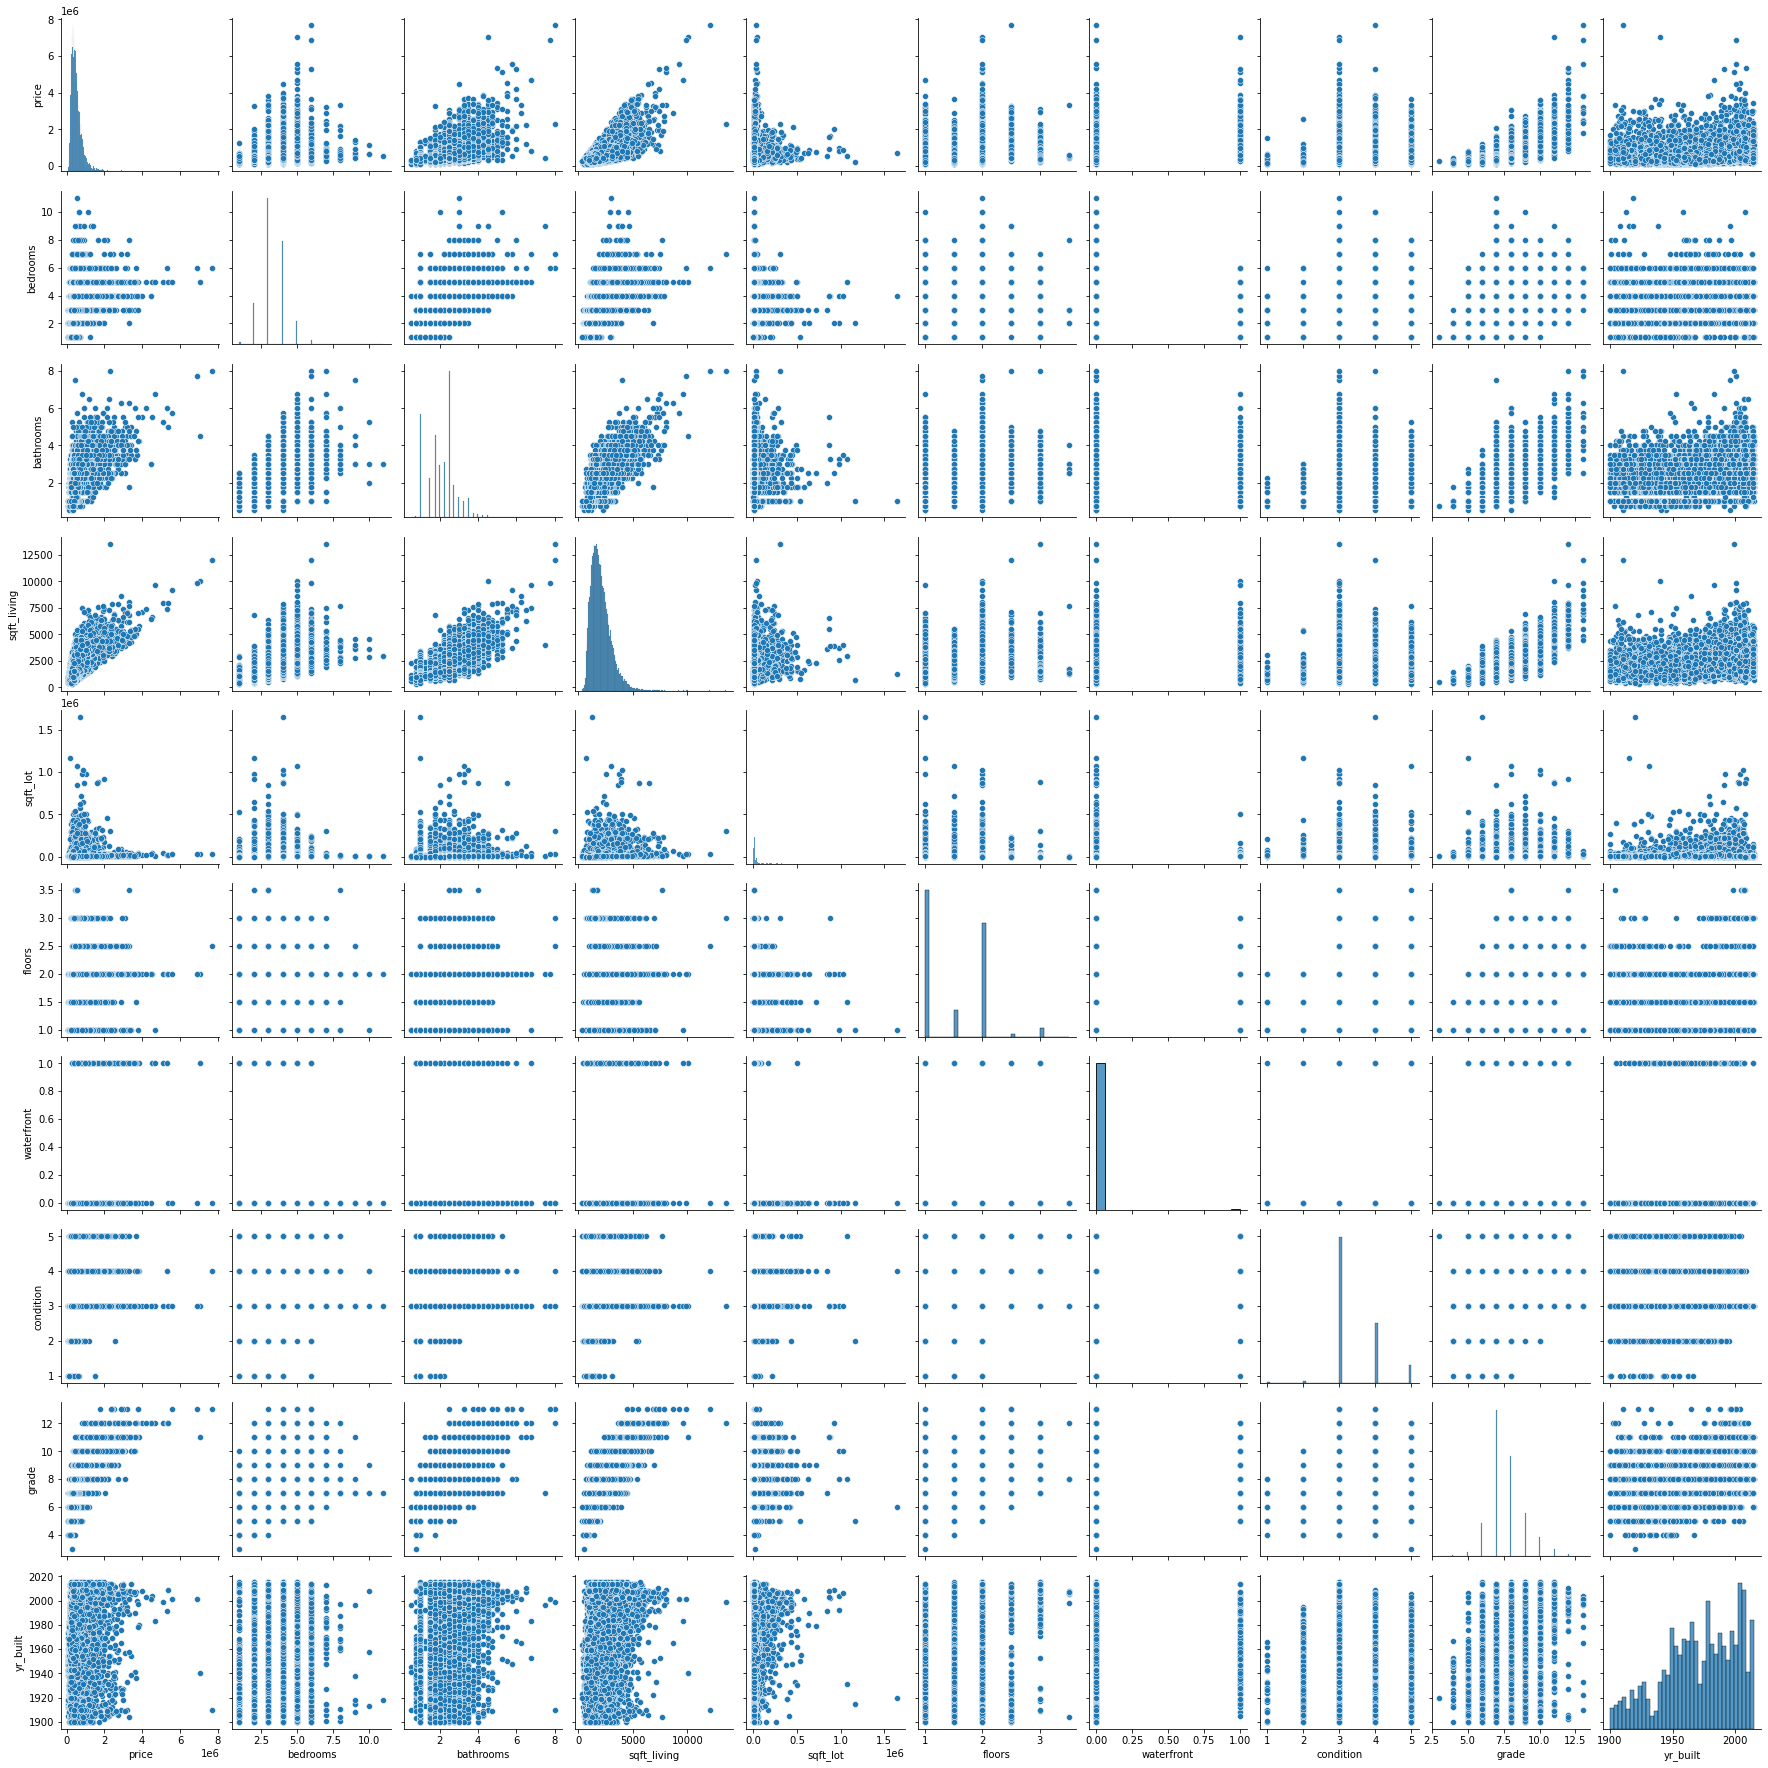

In [298]:
sns.pairplot(df1);

In [299]:
df1.nunique()

price          3607
bedrooms         11
bathrooms        29
sqft_living    1034
sqft_lot       9776
floors            6
waterfront        2
condition         5
grade            11
yr_built        116
dtype: int64

In [300]:
#Seems like we have the following variables:

#Continues variables:

#price
#sqft_living
#sqft_lot

#Categorical variables:

#bedrooms
#bathrooms
#floors
#waterfront
#condition
#grade
#yr_built

In [301]:
#Investigating Bathroom and rounding the bathroom numbers as it is better categorized whole.
df1['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [302]:
#Converting Bathroom into integer
df1['bathrooms'] = df1['bathrooms'].round().astype(int)

In [303]:
#Double checking for the correction
df1['bathrooms'].unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8])

In [304]:
# rounding off floors
df1['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [305]:
df1['floors'] = df1['floors'].round().astype(int)

In [306]:
# Same as the yr_built, checking
unique_years = df1['yr_built'].unique()
np.sort(unique_years)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [307]:
# Narrowing it down to a 3 bins categorised by half century
# Convert yr_built;
# 1900 to 1950 = yr_1900-1950
# 1951 to 2000 = yr_1951-1900
# 2001 to 2015 = yr_2001-2015

def half_cent(year):
    if 1899 < year < 1951:
        return 1
    elif 1950 < year < 2000:
        return 2
    else: return 3

In [308]:
df1['yr_built'] = df1['yr_built'].apply(half_cent)

In [309]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7129300520,221900.0,3,1,1180,5650,1,0,3,7,2
6414100192,538000.0,3,2,2570,7242,2,0,3,7,2
5631500400,180000.0,2,1,770,10000,1,0,3,6,1
2487200875,604000.0,4,3,1960,5000,1,0,5,7,2
1954400510,510000.0,3,2,1680,8080,1,0,3,8,2
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2,1530,1131,3,0,3,8,3
6600060120,400000.0,4,2,2310,5813,2,0,3,8,3
1523300141,402101.0,2,1,1020,1350,2,0,3,7,3
291310100,400000.0,3,2,1600,2388,2,0,3,8,3


In [310]:
df1.nunique()

price          3607
bedrooms         11
bathrooms         9
sqft_living    1034
sqft_lot       9776
floors            4
waterfront        2
condition         5
grade            11
yr_built          3
dtype: int64

# First Iteration

In [329]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [330]:
df2 = df1.copy()

In [331]:
# creating dummies of categorical variables
bedr_dummies = pd.get_dummies(df2['bedrooms'], prefix='bedr', drop_first=True)
bathr_dummies = pd.get_dummies(df2['bathrooms'], prefix='bathr', drop_first=True)
floors_dummies = pd.get_dummies(df2['floors'], prefix='floors', drop_first=True)
waterfr_dummies = pd.get_dummies(df2['waterfront'], prefix='waterfr', drop_first=True)
cond_dummies = pd.get_dummies(df2['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df2['grade'], prefix='grade', drop_first=True)
yr_built_dummies = pd.get_dummies(df2['yr_built'], prefix='yr_built', drop_first=True)

In [332]:
# dropping off columns
df2 = df2.drop(['bedrooms','bathrooms','floors','waterfront','condition','grade','yr_built'], axis=1)

In [333]:
# combining new data and the dummy columns
df2 = pd.concat([df2, bedr_dummies, bathr_dummies, floors_dummies, waterfr_dummies, cond_dummies, grade_dummies, yr_built_dummies], axis = 1)

In [334]:
# making the first iteration
Y = 'price'
X1 = df2.drop(['price'], axis = 1)
X1_columns = "+".join(X1.columns)

In [335]:
ols_formula = Y + "~" + X1_columns

OLS = ols(formula = ols_formula, data = df2)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:41:34   Log-Likelihood:            -2.9292e+05
No. Observations:               21420   AIC:                         5.859e+05
Df Residuals:                   21379   BIC:                         5.863e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.847e+04   2.39e+05     -0.077      0.938   -4.87e+05     4.5e+05
sqft_living   151.5138      3.303     45.867      0.000     145.039     157.989
sqft_lot       -0.2761      0.036     -7.742      0.000      -0.346      -0.206
bedr_2       -673.3283   1.62e+04     -0.042      0.967   -3.24e+04     3.1e+04
bedr_3      -2.299e+04   1.62e+04     -1.418      0.156   -5.48e+04    8779.180
bedr_4      -5.323e+04   1.65e+04     -3.219      0.001   -8.56e+04   -2.08e+04
bedr_5      -4.011e+04   1.74e+04     -2.302      0.021   -7.43e+04   -5961.333
bedr_6      -7.174e+04   2.13e+04     -3.371      0.001   -1.13e+05      -3e+04
bedr_7      -1.499e+05   3.87e+04     -3.872      0.000   -2.26e+05    -7.4e+04
bedr_8       7.978e+04   6.14e+04      1.299      0.194   -4.06e+04       2e+05
bedr_9      -3.613e+05   8.97e+04     -4.027      0.000   -5.37e+05   -1.85e+05
bedr_10     -1.332e+05   1.23e+05     -1.082      0.279   -3.75e+05    1.08e+05
bedr_11     -2.357e+05   2.11e+05     -1.115      0.265    -6.5e+05    1.78e+05
bathr_1       1.07e+05   1.05e+05      1.015      0.310   -9.96e+04    3.14e+05
bathr_2       1.05e+05   1.05e+05      0.996      0.319   -1.02e+05    3.12e+05
bathr_3      1.438e+05   1.06e+05      1.362      0.173   -6.31e+04    3.51e+05
bathr_4      1.995e+05   1.06e+05      1.887      0.059   -7776.118    4.07e+05
bathr_5      4.745e+05    1.1e+05      4.332      0.000     2.6e+05    6.89e+05
bathr_6      5.969e+05   1.15e+05      5.170      0.000    3.71e+05    8.23e+05
bathr_7      2.999e+05   1.84e+05      1.626      0.104   -6.17e+04    6.61e+05
bathr_8      1.682e+06   1.56e+05     10.779      0.000    1.38e+06    1.99e+06
floors_2    -2.243e+04   3639.384     -6.164      0.000   -2.96e+04   -1.53e+04
floors_3     7.115e+04   9664.579      7.362      0.000    5.22e+04    9.01e+04
floors_4     1.348e+05   8.02e+04      1.680      0.093   -2.24e+04    2.92e+05
waterfr_1    7.467e+05   1.78e+04     42.064      0.000    7.12e+05    7.82e+05
cond_2      -1.936e+04   4.32e+04     -0.448      0.654   -1.04e+05    6.53e+04
cond_3       6654.5043   4.01e+04      0.166      0.868    -7.2e+04    8.53e+04
cond_4       4.796e+04   4.01e+04      1.195      0.232   -3.07e+04    1.27e+05
cond_5       9.829e+04   4.04e+04      2.435      0.015    1.92e+04    1.77e+05
grade_4      2.266e+04   2.15e+05      0.106      0.916   -3.98e+05    4.43e+05
grade_5      1.718e+04   2.11e+05      0.081      0.935   -3.97e+05    4.32e+05
grade_6      7.694e+04   2.11e+05      0.364      0.716   -3.37e+05    4.91e+05
grade_7      1.929e+05   2.11e+05      0.913      0.361   -2.21e+05    6.07e+05
grade_8      2.933e+05   2.11e+05      1.388      0.165   -1.21e+05    7.07e+05
grade_9      4.359e+05   2.11e+05      2.063      0.039    2.18e+04     8.5e+05
grade_10     6.108e+05   2.11e+05      2.88

> - **Skew**  = 1.866 indicates the model is positively skewed
> - **Kurtosis** = 20.806 suggests that the residuals in the OLS regression model have heavy tails, which can have implications for the validity of the model's assumptions and the reliability of its results. Further investigation and potentially some adjustments to the model or data preprocessing may be necessary to address this issue and improve the model's performance.
>
>Also, the R-squared and Adjusted R-squared values are very close to each other, indicating that the inclusion of independent variables in the model does not significantly affect the model's explanatory power. This suggests that the independent variables included in the model are collectively explaining a substantial portion (about 67.4% to 67.5%) of the variance in the dependent variable.
>
>We will address these issues while working to improve our R-squared and Adjusted R-squared values.